# Time-frequency analysis  


In [1]:
%matplotlib inline

import the necessary libraries

In [2]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np

Read raw data

In [3]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


For simplicity, we select only magnetometers

In [4]:
mag_only = raw.copy().pick_types(meg='mag')

Find events

In [5]:
events = mne.find_events(raw, stim_channel='STI 014')

320 events found
Event IDs: [ 1  2  3  4  5 32]


Choose only left and right audio stimuli

In [6]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

Make epochs

In [7]:
epochs = mne.Epochs(mag_only, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped


1) Let's plot TF for one channel use tfr_morlet

Applying baseline correction (mode: logratio)


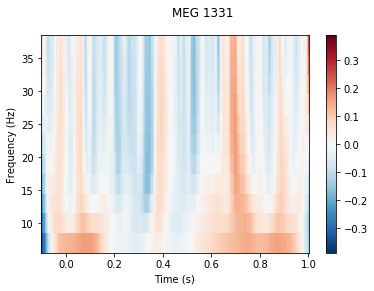

In [16]:
frequencies = np.arange(7, 40, 3) #alpha and beta 
power = mne.time_frequency.tfr_morlet(epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1331'], baseline=(None, 0), mode = 'logratio');

2) TF topomap

Applying baseline correction (mode: logratio)


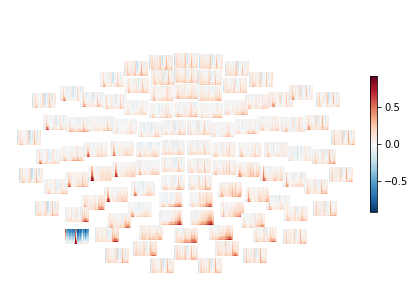

In [14]:
power_topomap = power.plot_topo(fig_facecolor='w', font_color='k', border='k', baseline=(None, 0), mode = 'logratio');
power_topomap.savefig('/home/vera/MNE/Examples/power_topomap.pdf')

Applying baseline correction (mode: mean)


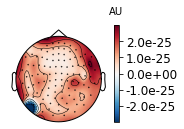

In [10]:
mne.viz.plot_tfr_topomap(power, tmin=0, tmax=1, baseline=(None, 0));